In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras import models, layers

In [3]:
df=pd.read_csv('base_nagatac.csv')

print(df.head())

   Dia  Mes   Ano  Caudal_Diario        date    chirps     chirts    viento  \
0    1    1  1983           4.34  1983-01-01  0.000000  30.392784 -5.599991   
1    2    1  1983           4.14  1983-01-02  0.000000  29.586417 -5.000000   
2    3    1  1983           4.14  1983-01-03  0.000000  30.153919 -4.399994   
3    4    1  1983           4.34  1983-01-04  0.000000  30.549536 -5.599991   
4    5    1  1983           4.76  1983-01-05  3.131954  30.997926 -6.000000   

   humedad      lon.x  ...  temp_lag_4m  temp_lag_5m  temp_lag_6m  \
0   0.0182 -84.599934  ...          NaN          NaN          NaN   
1   0.0189 -84.599934  ...          NaN          NaN          NaN   
2   0.0181 -84.599934  ...          NaN          NaN          NaN   
3   0.0178 -84.599934  ...          NaN          NaN          NaN   
4   0.0173 -84.599934  ...    30.392784          NaN          NaN   

   prep_lag_1m  prep_lag_2m  prep_lag_3m  prep_lag_4m  prep_lag_5m  \
0          NaN          NaN          NaN

In [4]:
df = df.dropna()

In [5]:
datetime = df["date"]  

x=df[["chirts","chirps", "NINO3.4", "viento", "humedad", 
                            "caudal_lag_1m", "caudal_lag_2m", "caudal_lag_3m",
                            "caudal_lag_4m", "caudal_lag_5m", "caudal_lag_6m",
                            "temp_lag_2m", "temp_lag_3m", "temp_lag_4m", 
                            "temp_lag_5m", "temp_lag_6m", 
                            "prep_lag_1m", "prep_lag_2m", "prep_lag_3m", 
                            "prep_lag_4m", "prep_lag_5m", "prep_lag_6m"]]
y=df["Caudal_Diario"]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

x_esc = scaler_X.fit_transform(x)
y_esc = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [6]:
print(df.isna().sum())

Dia              0
Mes              0
Ano              0
Caudal_Diario    0
date             0
chirps           0
chirts           0
viento           0
humedad          0
lon.x            0
lat.x            0
lon.y            0
lat.y            0
caudal_lag_1m    0
caudal_lag_2m    0
caudal_lag_3m    0
caudal_lag_4m    0
caudal_lag_5m    0
caudal_lag_6m    0
temp_lag_2m      0
temp_lag_3m      0
temp_lag_4m      0
temp_lag_5m      0
temp_lag_6m      0
prep_lag_1m      0
prep_lag_2m      0
prep_lag_3m      0
prep_lag_4m      0
prep_lag_5m      0
prep_lag_6m      0
NINO3.4          0
dtype: int64


In [7]:
# Asegurarse de que los datos sean float32
x_esc = x_esc.astype('float32')
y_esc = y_esc.astype('float32')

In [9]:
# Definir el modelo
modelo = models.Sequential([
    layers.InputLayer(input_shape=(22,)),  # 22 características de entrada
    layers.Dense(64, activation='relu'),   # Capa oculta 1
    layers.Dense(32, activation='relu'),   # Capa oculta 2
    layers.Dense(16, activation='relu'),   # Capa oculta 3
    layers.Dense(1)                        # Capa de salida (una neurona para regresión)
])

# Compilar el modelo con tasa de aprendizaje más baja
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mean_squared_error"
)

# Entrenamiento con batch_size más pequeño
historial = modelo.fit(x_esc, y_esc, epochs=200, batch_size=16, verbose=True)

c:\Users\Usuario\Desktop\CIMPA\Codigo\Caracucho\venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0083
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027    
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045    
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020    
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053    
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018    
Epoch 8/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045    
Epoch 9/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 10/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022    
Epoch 11/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 12/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043    
Epoch 13/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022    
Epoch 14/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045
Epoch 15/200
39/39 ━━━━━━━━━━━━━━━━

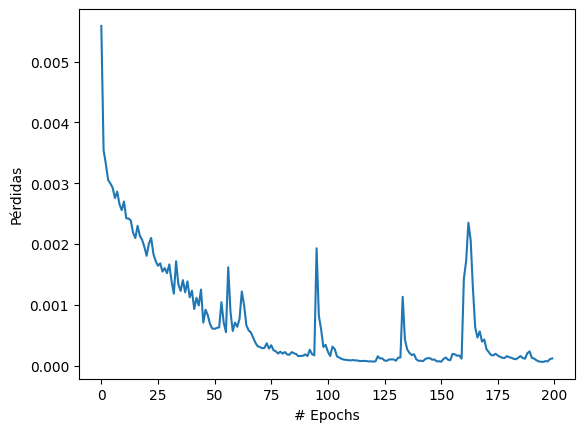

In [10]:
import matplotlib.pyplot as plt
plt.xlabel("# Epochs")
plt.ylabel("Pérdidas")
plt.plot(historial.history["loss"])

In [11]:
predictions_scaled = modelo.predict(x_esc)
predictions = scaler_y.inverse_transform(predictions_scaled).flatten()

y_test_pred = predictions

# Evaluar métricas
rmse = np.sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)


print(f"R²: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R²: 0.9794673116673407
RMSE: 3.0774885489500297
MAE: 2.0460815572660347


In [12]:
mean_real = y.mean()

# Calcular rendimiento en porcentaje
rendimiento = 100 * (1 - (mae / mean_real))

print(f"MAE: {mae:.2f}")
print(f"Rendimiento del modelo: {rendimiento:.2f}%")

MAE: 2.05
Rendimiento del modelo: 83.60%


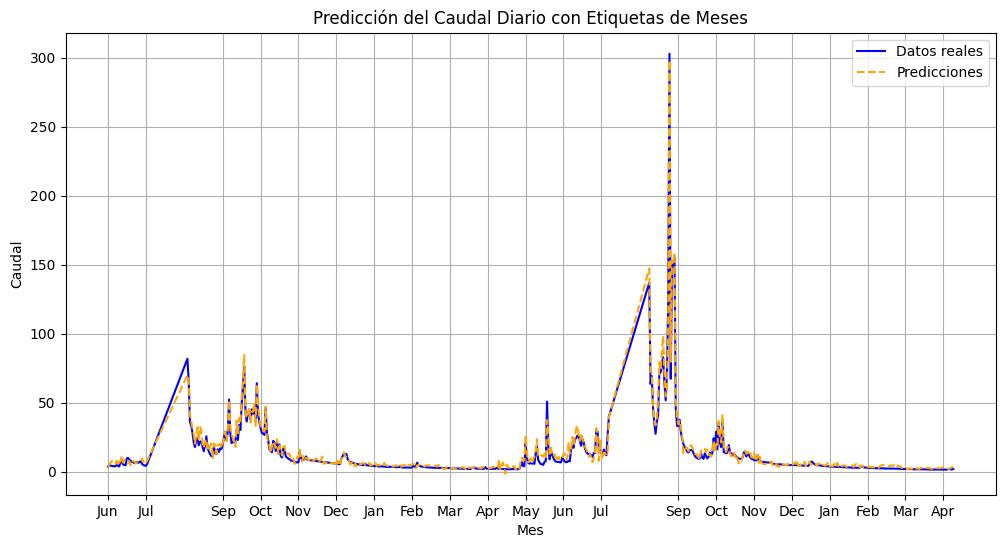

In [13]:
# Asegurar que la columna datetime es de tipo fecha
df["datetime"] = pd.to_datetime(df["date"])

# Definir variables correctamente
datetime = df["datetime"]
y = df["Caudal_Diario"]

# Crear DataFrames con las fechas correctas
y_test_grouped = pd.DataFrame({'datetime': datetime, 'Real': y}).groupby('datetime').mean()
predictions_grouped = pd.DataFrame({'datetime': datetime, 'Prediccion': predictions}).groupby('datetime').mean()

# Fusionar datos
resultados = y_test_grouped.merge(predictions_grouped, left_index=True, right_index=True)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(resultados.index, resultados['Real'], label='Datos reales', color='blue')
plt.plot(resultados.index, resultados['Prediccion'], label='Predicciones', color='orange', linestyle='dashed')

# Configurar etiquetas del eje X con nombres de los meses
plt.xticks(ticks=resultados.index[::30], labels=resultados.index[::30].strftime('%b'))

# Agregar títulos y etiquetas
plt.title('Predicción del Caudal Diario con Etiquetas de Meses')
plt.xlabel('Mes')
plt.ylabel('Caudal')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()